In [1]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("datasets/fish"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'datasets/fish'.
There are 31 directories and 0 images in 'datasets/fish\test'.
There are 0 directories and 34 images in 'datasets/fish\test\Bangus'.
There are 0 directories and 43 images in 'datasets/fish\test\Big Head Carp'.
There are 0 directories and 40 images in 'datasets/fish\test\Black Spotted Barb'.
There are 0 directories and 62 images in 'datasets/fish\test\Catfish'.
There are 0 directories and 30 images in 'datasets/fish\test\Climbing Perch'.
There are 0 directories and 38 images in 'datasets/fish\test\Fourfinger Threadfin'.
There are 0 directories and 55 images in 'datasets/fish\test\Freshwater Eel'.
There are 0 directories and 77 images in 'datasets/fish\test\Glass Perchlet'.
There are 0 directories and 124 images in 'datasets/fish\test\Goby'.
There are 0 directories and 41 images in 'datasets/fish\test\Gold Fish'.
There are 0 directories and 63 images in 'datasets/fish\test\Gourami'.
There are 0 directories and 238 images in 'datase

In [2]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("datasets/fish/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['Bangus' 'Big Head Carp' 'Black Spotted Barb' 'Catfish' 'Climbing Perch'
 'Fourfinger Threadfin' 'Freshwater Eel' 'Glass Perchlet' 'Goby'
 'Gold Fish' 'Gourami' 'Grass Carp' 'Green Spotted Puffer' 'Indian Carp'
 'Indo-Pacific Tarpon' 'Jaguar Gapote' 'Janitor Fish' 'Knifefish'
 'Long-Snouted Pipefish' 'Mosquito Fish' 'Mudfish' 'Mullet' 'Pangasius'
 'Perch' 'Scat Fish' 'Silver Barb' 'Silver Carp' 'Silver Perch'
 'Snakehead' 'Tenpounder' 'Tilapia']


In [3]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # Show the shape of the image

    return img

['Picture598.jpg']
Image shape: (168, 299, 3)


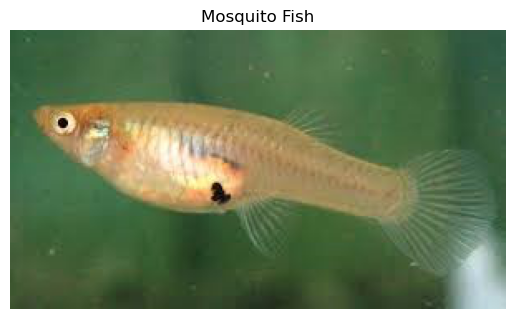

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir="datasets/fish/train/",
                        target_class="Mosquito Fish")

In [7]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(168, 299, 3), dtype=uint8, numpy=
array([[[ 45,  91,  55],
        [ 46,  92,  56],
        [ 46,  92,  56],
        ...,
        [ 50,  92,  70],
        [ 50,  92,  70],
        [ 50,  92,  70]],

       [[ 45,  91,  55],
        [ 46,  92,  56],
        [ 46,  92,  56],
        ...,
        [ 50,  92,  70],
        [ 50,  92,  70],
        [ 50,  92,  70]],

       [[ 45,  91,  55],
        [ 46,  92,  56],
        [ 46,  92,  56],
        ...,
        [ 49,  91,  69],
        [ 49,  91,  69],
        [ 49,  91,  69]],

       ...,

       [[ 62,  84,  48],
        [ 61,  83,  47],
        [ 61,  83,  47],
        ...,
        [189, 210, 213],
        [187, 208, 211],
        [185, 206, 209]],

       [[ 61,  83,  47],
        [ 60,  82,  46],
        [ 60,  82,  46],
        ...,
        [192, 213, 216],
        [190, 211, 214],
        [188, 209, 212]],

       [[ 60,  82,  46],
        [ 60,  82,  46],
        [ 59,  81,  45],
        ...,
        [196, 217, 22

In [8]:
img.shape

(168, 299, 3)

In [9]:
img/255.

array([[[0.17647059, 0.35686275, 0.21568627],
        [0.18039216, 0.36078431, 0.21960784],
        [0.18039216, 0.36078431, 0.21960784],
        ...,
        [0.19607843, 0.36078431, 0.2745098 ],
        [0.19607843, 0.36078431, 0.2745098 ],
        [0.19607843, 0.36078431, 0.2745098 ]],

       [[0.17647059, 0.35686275, 0.21568627],
        [0.18039216, 0.36078431, 0.21960784],
        [0.18039216, 0.36078431, 0.21960784],
        ...,
        [0.19607843, 0.36078431, 0.2745098 ],
        [0.19607843, 0.36078431, 0.2745098 ],
        [0.19607843, 0.36078431, 0.2745098 ]],

       [[0.17647059, 0.35686275, 0.21568627],
        [0.18039216, 0.36078431, 0.21960784],
        [0.18039216, 0.36078431, 0.21960784],
        ...,
        [0.19215686, 0.35686275, 0.27058824],
        [0.19215686, 0.35686275, 0.27058824],
        [0.19215686, 0.35686275, 0.27058824]],

       ...,

       [[0.24313725, 0.32941176, 0.18823529],
        [0.23921569, 0.3254902 , 0.18431373],
        [0.23921569, 0

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "datasets/fish/train"
val_dir = "datasets/fish/val"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                   batch_size=32,
                                                   target_size=(224, 224),
                                                   class_mode="categorical",
                                                   seed=42)

valid_data = valid_datagen.flow_from_directory(directory=val_dir,
                                                   batch_size=32,
                                                   target_size=(224, 224),
                                                   class_mode="categorical",
                                                   seed=42)

# Get number of classes
num_classes = len(train_data.class_indices)

Found 8791 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.


In [12]:
# Build a CNN model
model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation="softmax"),
])

# Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
275/275 [==============================] - 62s 223ms/step - loss: 2.7168 - accuracy: 0.2708 - val_loss: 1.7809 - val_accuracy: 0.5304
Epoch 2/5
275/275 [==============================] - 60s 217ms/step - loss: 1.4721 - accuracy: 0.5947 - val_loss: 0.7835 - val_accuracy: 0.8023
Epoch 3/5
275/275 [==============================] - 63s 229ms/step - loss: 0.5822 - accuracy: 0.8349 - val_loss: 0.4757 - val_accuracy: 0.9004
Epoch 4/5
275/275 [==============================] - 61s 221ms/step - loss: 0.1928 - accuracy: 0.9469 - val_loss: 0.4225 - val_accuracy: 0.9375
Epoch 5/5
275/275 [==============================] - 56s 205ms/step - loss: 0.0922 - accuracy: 0.9759 - val_loss: 0.5169 - val_accuracy: 0.9277


In [13]:
def model_accuracy_plot(histories, titles):
    fig, axes = plt.subplots(1, len(histories), figsize=(18, 5))  # 1 row, 3 columns, larger figsize for better readability
    if len(histories) == 1:
        plt.plot(histories[0].history['accuracy'])
        plt.plot(histories[0].history['val_accuracy'])
        plt.title(titles[0])
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')
        plt.grid(True)
    else:
        for i, ax in enumerate(axes):
            ax.plot(histories[i].history['accuracy'])
            ax.plot(histories[i].history['val_accuracy'])
            ax.set_title(titles[i])
            ax.set_ylabel('Accuracy')
            ax.set_xlabel('Epoch')
            ax.legend(['Accuracy', 'Validation'], loc='upper left')
            ax.grid(True)  # Optional: adds a grid for easier reading

    plt.tight_layout()
    plt.show()

def model_loss_plot(histories, titles):
    fig, axes = plt.subplots(1, len(histories), figsize=(18, 5))
    if len(histories) == 1:
        plt.plot(histories[0].history['loss'])
        plt.plot(histories[0].history['val_loss'])
        plt.title(titles[0])
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Loss', 'Validation Loss'], loc='upper left')
        plt.grid(True)
    else:
        for i, ax in enumerate(axes):
            ax.plot(histories[i].history['loss'])
            ax.plot(histories[i].history['val_loss'])
            ax.set_title(titles[i])
            ax.set_ylabel('Loss')
            ax.set_xlabel('Epoch')
            ax.legend(['Train', 'Validation'], loc='upper left')
            ax.grid(True)
    plt.tight_layout()
    plt.show()

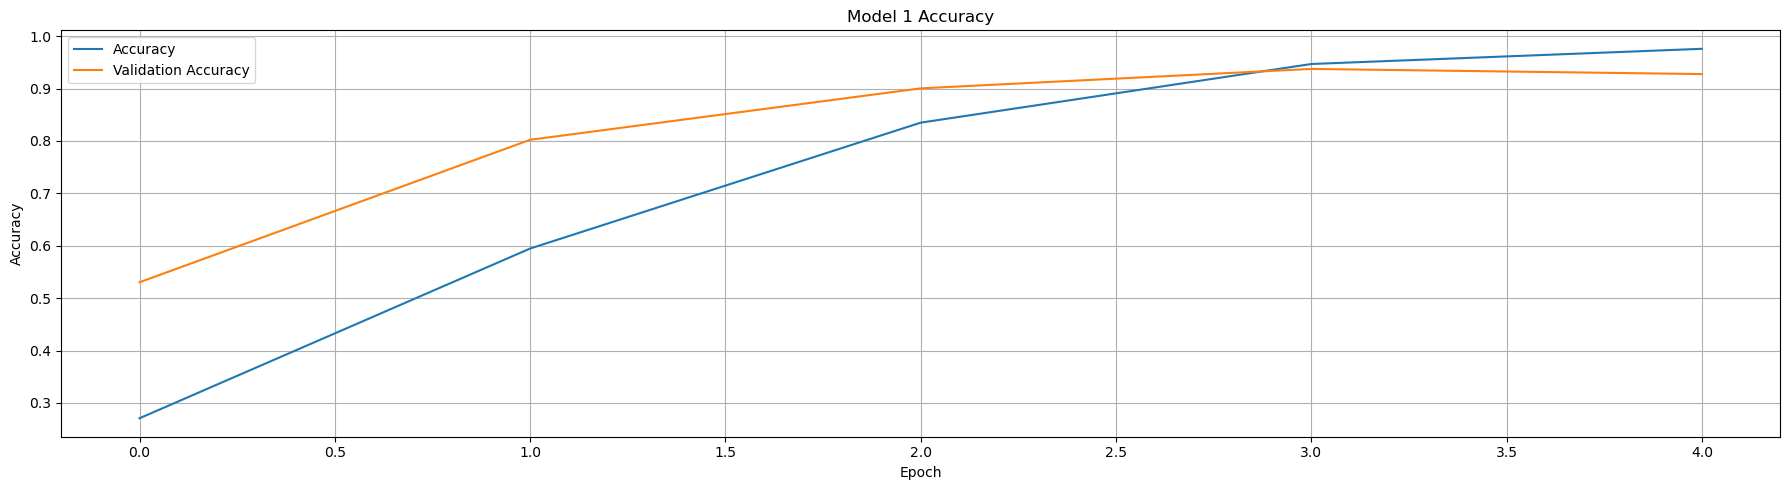

In [14]:
model_accuracy_plot([history_0], ["Model 1 Accuracy"])

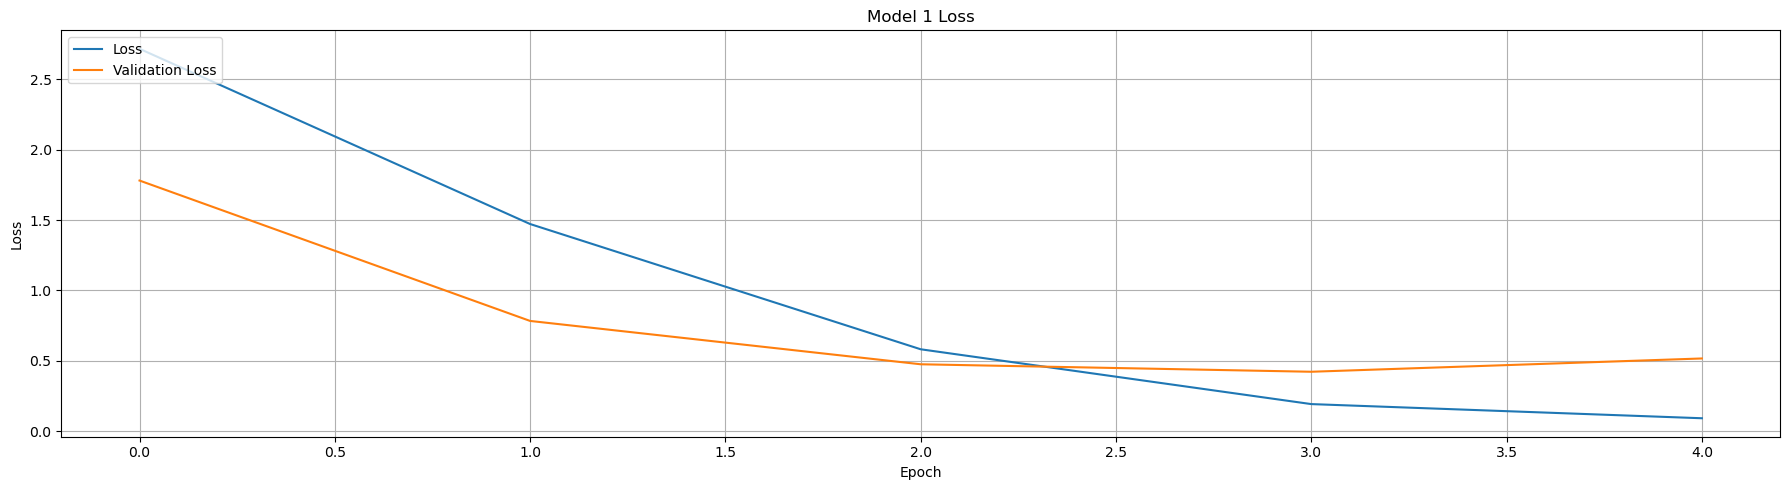

In [15]:
model_loss_plot([history_0], ["Model 1 Loss"])

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confusion_matrix_plot_multiclass(model, title, valid_data):
    # Get the true labels from validation data
    y_true = valid_data.classes  # true labels

    # Predict probabilities and convert to class labels
    y_pred_probs = model.predict(valid_data, steps=len(valid_data), verbose=1)
    y_pred = np.argmax(y_pred_probs, axis=1)  # get the class with the highest probability

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=valid_data.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
    fig = disp.figure_
    fig.set_figheight(15)
    fig.set_figwidth(15)
    plt.title(title+" Confusion Matrix")
    plt.show()

86/86 [==============================] - 10s 115ms/step


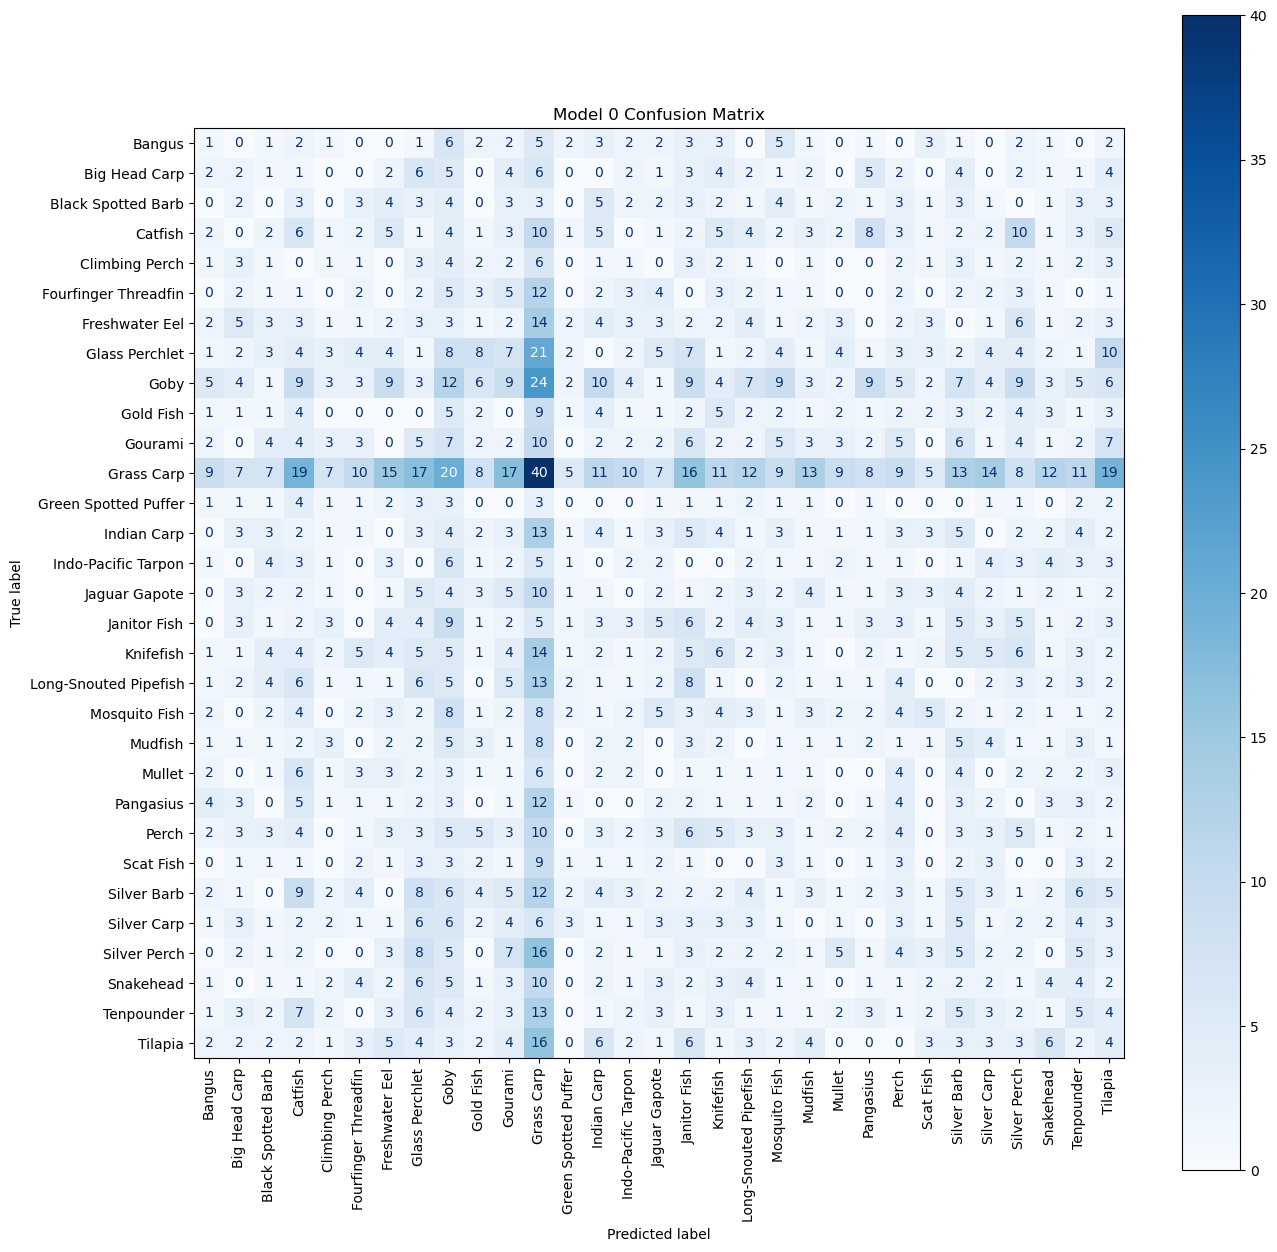

In [23]:
confusion_matrix_plot_multiclass(model_0, "Model 0", valid_data)

In [27]:
# import numpy as np
#
# # Load and preprocess a single image
# def preprocess_image(img_path, target_size=(224, 224)):
#     img = image.load_img(img_path, target_size=target_size)  # Load image
#     img_array = image.img_to_array(img)  # Convert image to array
#     img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch
#     img_array = img_array / 255.0  # Normalize (same as training)
#     return img_array
#
#
#
# # Path to your test image
# test_image_path = "datasets/fish/test/Catfish/0efe7c4b-76e6-4461-9db8-29fda1c30d3e-710mm.jpg"  # Change this to your test image
#
# # Preprocess the image
# input_image = preprocess_image(test_image_path)
#
# # Make a prediction
# predictions = model_0.predict(input_image)
#
# # Get class labels
# class_labels = list(train_data.class_indices.keys())  # Get class labels from training data
#
# # Get the predicted class index
# predicted_class_index = np.argmax(predictions)
#
# # Get the class label
# predicted_class_label = class_labels[predicted_class_index]
#
# # Print results
# print(f"Predicted Class: {predicted_class_label}")
# print(f"Prediction Probabilities: {predictions}")


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess a single image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Load image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch
    img_array = img_array / 255.0  # Normalize (same as training)
    return img, img_array

def predict_image(img_path, model):

    # Preprocess the image
    original_img, input_image = preprocess_image(img_path)

    # Make a prediction
    predictions = model.predict(input_image)

    # Get class labels
    class_labels = list(train_data.class_indices.keys())  # Get class labels from training data

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Get the class label
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image with prediction
    plt.imshow(original_img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class_label} ({predictions[0][predicted_class_index]*100:.2f}%)")
    plt.show()


1/1 [==============================] - 0s 10ms/step


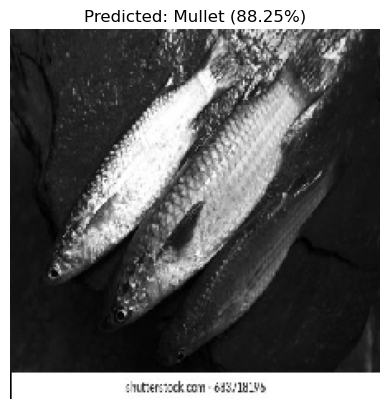

In [39]:
predict_image("datasets/fish/test/Mullet/mullet40.jpg", model_0)